In [19]:
import pickle
import json

import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, utils, decomposition, model_selection, linear_model, discriminant_analysis, svm, tree, ensemble

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

import matplotlib.pyplot as plt


In [26]:
data = None

with open('full_factorial/all_experiments_full_factorial.pickle', 'rb') as f:
    data = pickle.load(f)

In [3]:
configs = None

with open('full_factorial/experiment_data_with_id_full_factorial.json') as f:
    configs = json.load(f)

In [18]:
configs_df = pd.read_csv('full_factorial/full_factorial_configs_as_df.csv')

## Actual analysis

### Power calculation

In [7]:
# TDP/core

# Skylake, Broadwell, Haswell, AMD EPYC Rome, and AMD EPYC Milan
# 6700: 65/4, 5775c: 65/8, 4770:  84/4, EPYC 7352: 155/24, EPYC 7443: 200/24

tdp_per_core = sum([65/4, 65/8, 84/4, 155/24, 200/24]) / 5

tdp_per_core

12.033333333333335

### Plot loaded data

In [24]:
columns_to_plot = list(data[list(data.keys())[0]].columns)

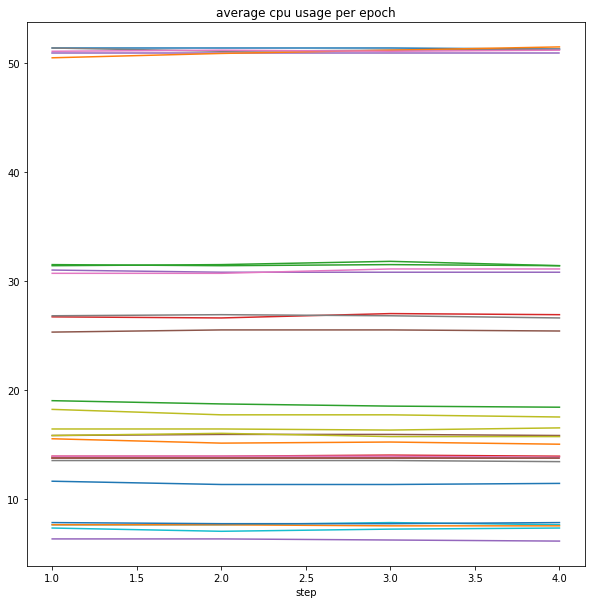

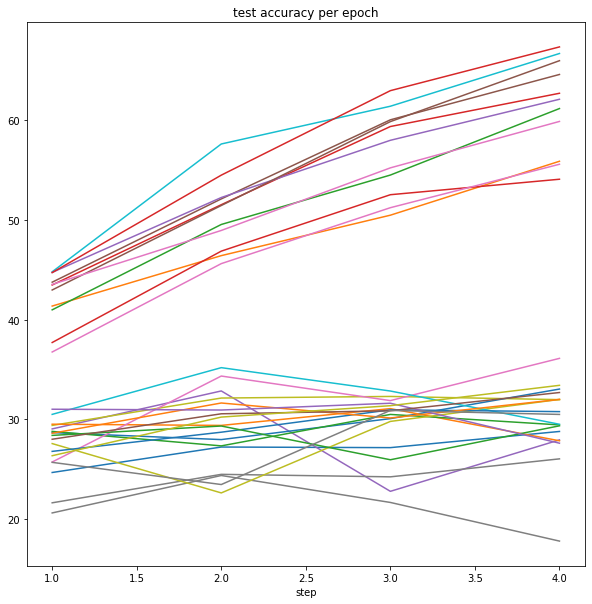

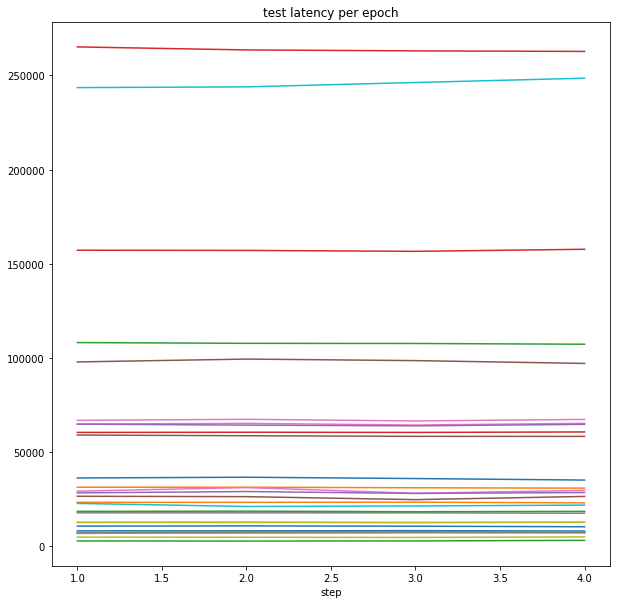

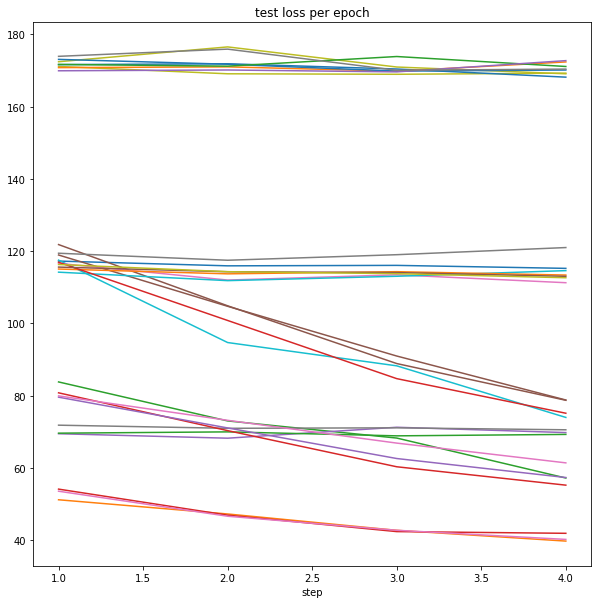

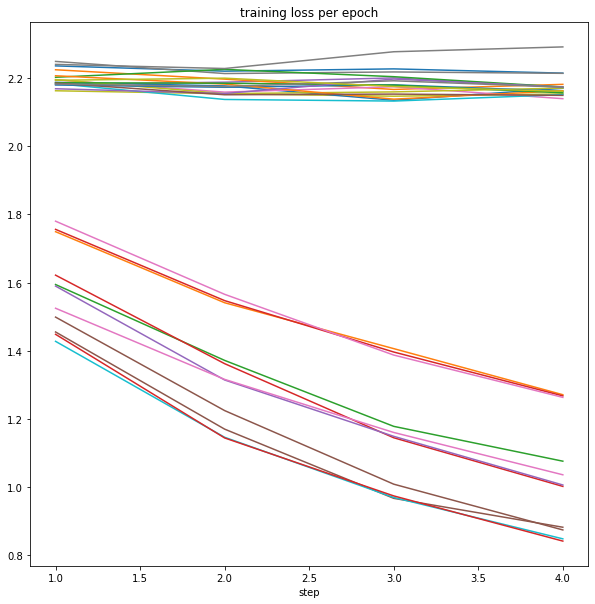

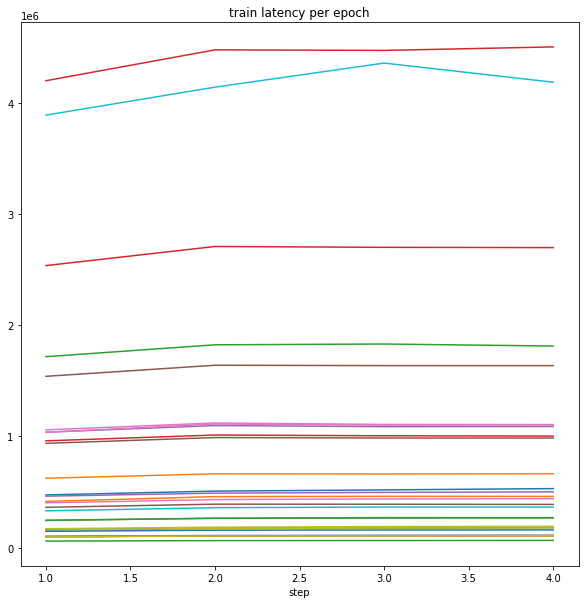

In [28]:
for column in columns_to_plot:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    for key in data:
        data[key].plot(x=None, y=column, title=key, ax=ax, legend=False)

    plt.title(column)
    plt.show()

### Setup

In [35]:
def prepare_data(X, y):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = preprocessing.StandardScaler().fit(X, y)

    # ... and scale the features
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [30]:
NETWORK_TO_FIT = "Cifar10CNN" # Cifar10ResNet

network_data = configs_df[configs_df['model'] == NETWORK_TO_FIT]

In [36]:
# UPDATE HERE THE COLUMNS YOU WANT TO USE FOR THE FITTING
X = network_data[[
#  'batch_size',
#  'test_batch_size',
 'Paralell',
#  'Memory',
 'CPU',
 ]]

# UPDATE HERE THE COLUMN THAT YOU WANT TO PREDICT
y = network_data['mean train latency per epoch']  

### Linear regression (basic, no optimization)

In [37]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('R2: \n', regr.score(X, y))

Intercept: 
 603476.3833711979
Coefficients: 
 [ -42168.91248381 -199022.23030341]
R2: 
 0.8625600782451797


### Hyperparam search

In [39]:
X_train, X_test, y_train, y_test = prepare_data(X, y)

opt = BayesSearchCV(
    ensemble.RandomForestRegressor(),
    {
        # 'bootstrap': [True, False],
        # 'max_depth': Integer(10,20),
        # 'max_features': ["sqrt", "log2", None],
        # 'min_samples_leaf': Integer(10,20),
        # 'min_samples_split': Integer(10,20),
        'n_estimators': Integer(1,150)
    },
    # error_score=0.0,
    n_iter=16,
    cv=5,
    verbose=5
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

# Print best params
print("best params: %s" % str(opt.best_params_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...................n_estimators=43;, score=0.886 total time=   0.1s
[CV 2/5] END ...................n_estimators=43;, score=0.643 total time=   0.1s
[CV 3/5] END ...................n_estimators=43;, score=0.498 total time=   0.1s
[CV 4/5] END ..................n_estimators=43;, score=-0.699 total time=   0.1s
[CV 5/5] END ..................n_estimators=43;, score=-1.697 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................n_estimators=106;, score=0.887 total time=   0.1s
[CV 2/5] END ..................n_estimators=106;, score=0.782 total time=   0.1s
[CV 3/5] END .................n_estimators=106;, score=-0.341 total time=   0.2s
[CV 4/5] END .................n_estimators=106;, score=-1.260 total time=   0.2s
[CV 5/5] END .................n_estimators=106;, score=-1.398 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

/usr/local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...................n_estimators=31;, score=0.933 total time=   0.0s
[CV 2/5] END ...................n_estimators=31;, score=0.742 total time=   0.0s
[CV 3/5] END ..................n_estimators=31;, score=-1.113 total time=   0.0s
[CV 4/5] END ..................n_estimators=31;, score=-0.396 total time=   0.0s
[CV 5/5] END ..................n_estimators=31;, score=-2.024 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...................n_estimators=41;, score=0.875 total time=   0.1s
[CV 2/5] END ...................n_estimators=41;, score=0.732 total time=   0.0s
[CV 3/5] END ...................n_estimators=41;, score=0.210 total time=   0.0s
[CV 4/5] END ..................n_estimators=41;, score=-0.663 total time=   0.0s
[CV 5/5] END ..................n_estimators=41;, score=-2.098 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

/usr/local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...................n_estimators=42;, score=0.862 total time=   0.0s
[CV 2/5] END ...................n_estimators=42;, score=0.524 total time=   0.0s
[CV 3/5] END ...................n_estimators=42;, score=0.552 total time=   0.0s
[CV 4/5] END ..................n_estimators=42;, score=-1.000 total time=   0.0s
[CV 5/5] END ..................n_estimators=42;, score=-1.611 total time=   0.0s
val. score: 0.04771509606016826
test score: 0.9271527462388807
best params: OrderedDict([('n_estimators', 42)])
